# **TITANIC SURVIVAL PREDICTION**


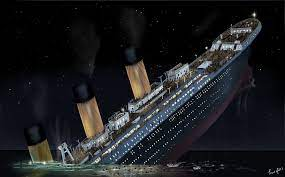



Utilize the Titanic dataset to construct a predictive model determining if a
passenger survived the Titanic disaster.
This project serves as an introductory exercise, offering accessible data for
analysis.
The dataset comprises passenger details encompassing age, gender, ticket
class, fare, cabin, and survival outcome.
By applying this data, you can embark on a classic project that provides
insights into survival patterns among Titanic passengers.

# **Data cleaning, preprocessing and datavisualisation**

**Import Libraries**

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read dataset**

In [139]:
df=pd.read_csv('/content/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [140]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [141]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [142]:
df.shape

(418, 12)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [144]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [145]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [146]:
df.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**check missing values**

In [147]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

327 values ​​of Cabin are missing in 418 rows. So let's drop this column.

In [148]:
df.drop(['Cabin'],inplace=True,axis=1)


We can also drop other unwanted columns.

In [149]:
df.drop(['PassengerId','Name','Ticket'],inplace=True,axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


<Axes: xlabel='Age', ylabel='Count'>

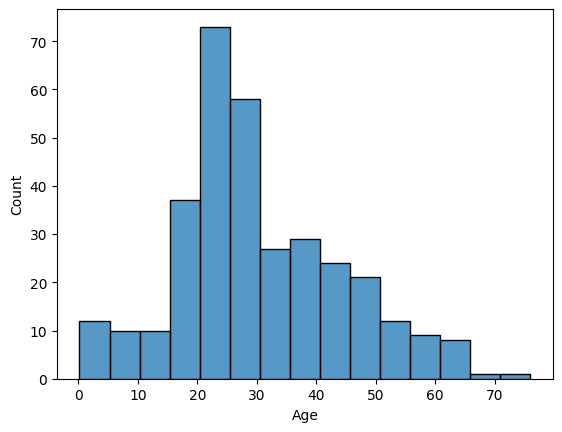

In [150]:
sns.histplot(x='Age',data=df)

Here we can fill the missing values of 'Age' with mean

In [151]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

<Axes: xlabel='Fare', ylabel='Count'>

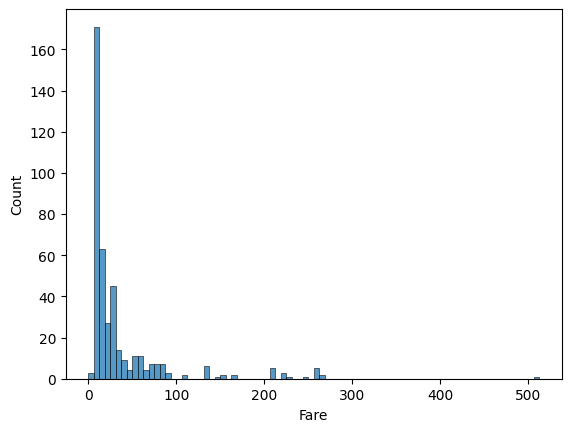

In [152]:
sns.histplot(x='Fare',data=df)

Here i use median to fill the missing value.

In [153]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [154]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

All the missing values are filled.

In [155]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

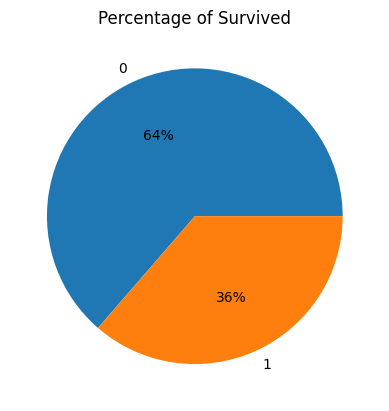

In [156]:
plt.pie(df.Survived.value_counts().values,labels=df.Survived.value_counts().index,autopct='%.0f%%')
plt.title('Percentage of Survived')
plt.show()

64% of the passengers did not survive and the remaining 36% did.

<ipython-input-157-bf029ae94c9b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],color='b')
<ipython-input-157-bf029ae94c9b>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'],color='g')


<Axes: >

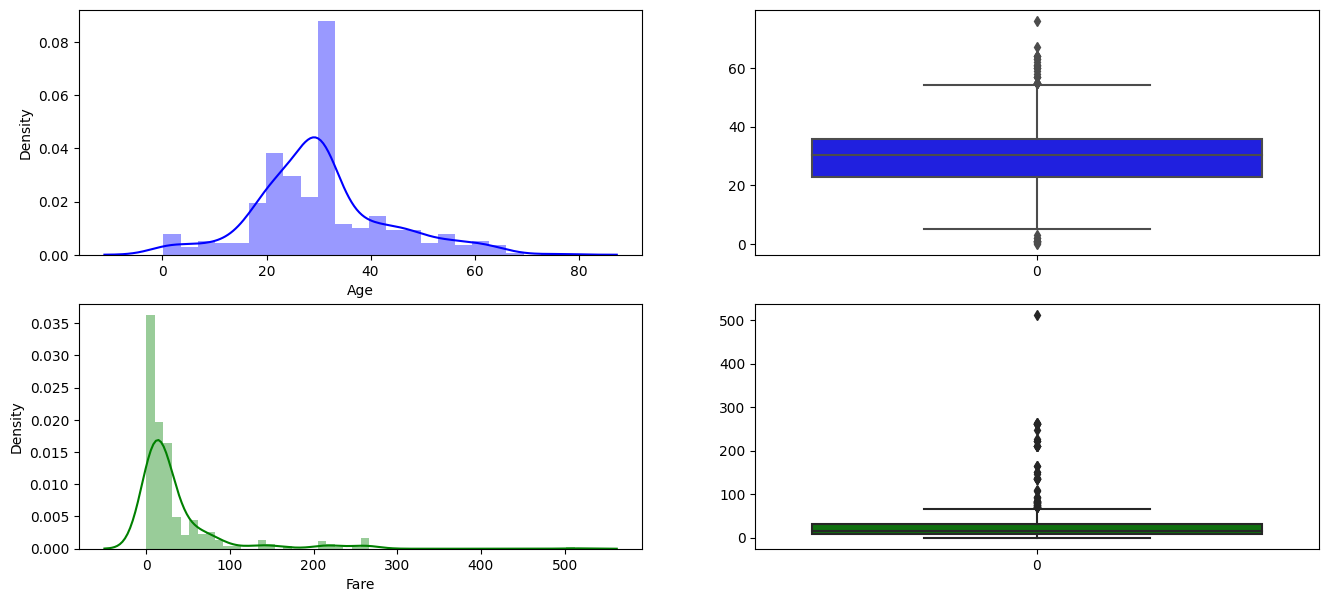

In [157]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(df['Age'],color='b')
plt.subplot(2,2,2)
sns.boxplot(df['Age'],color='b')

plt.subplot(2,2,3)
sns.distplot(df['Fare'],color='g')
plt.subplot(2,2,4)
sns.boxplot(df['Fare'],color='g')

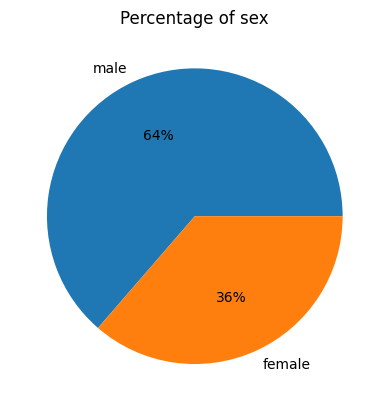

In [158]:
plt.pie(df.Sex.value_counts().values,labels=df.Sex.value_counts().index,autopct='%.0f%%')
plt.title('Percentage of sex')
plt.show()

Male Passengers are higher than female passengers.

Text(0.5, 1.0, 'Survived v/s Embarked')

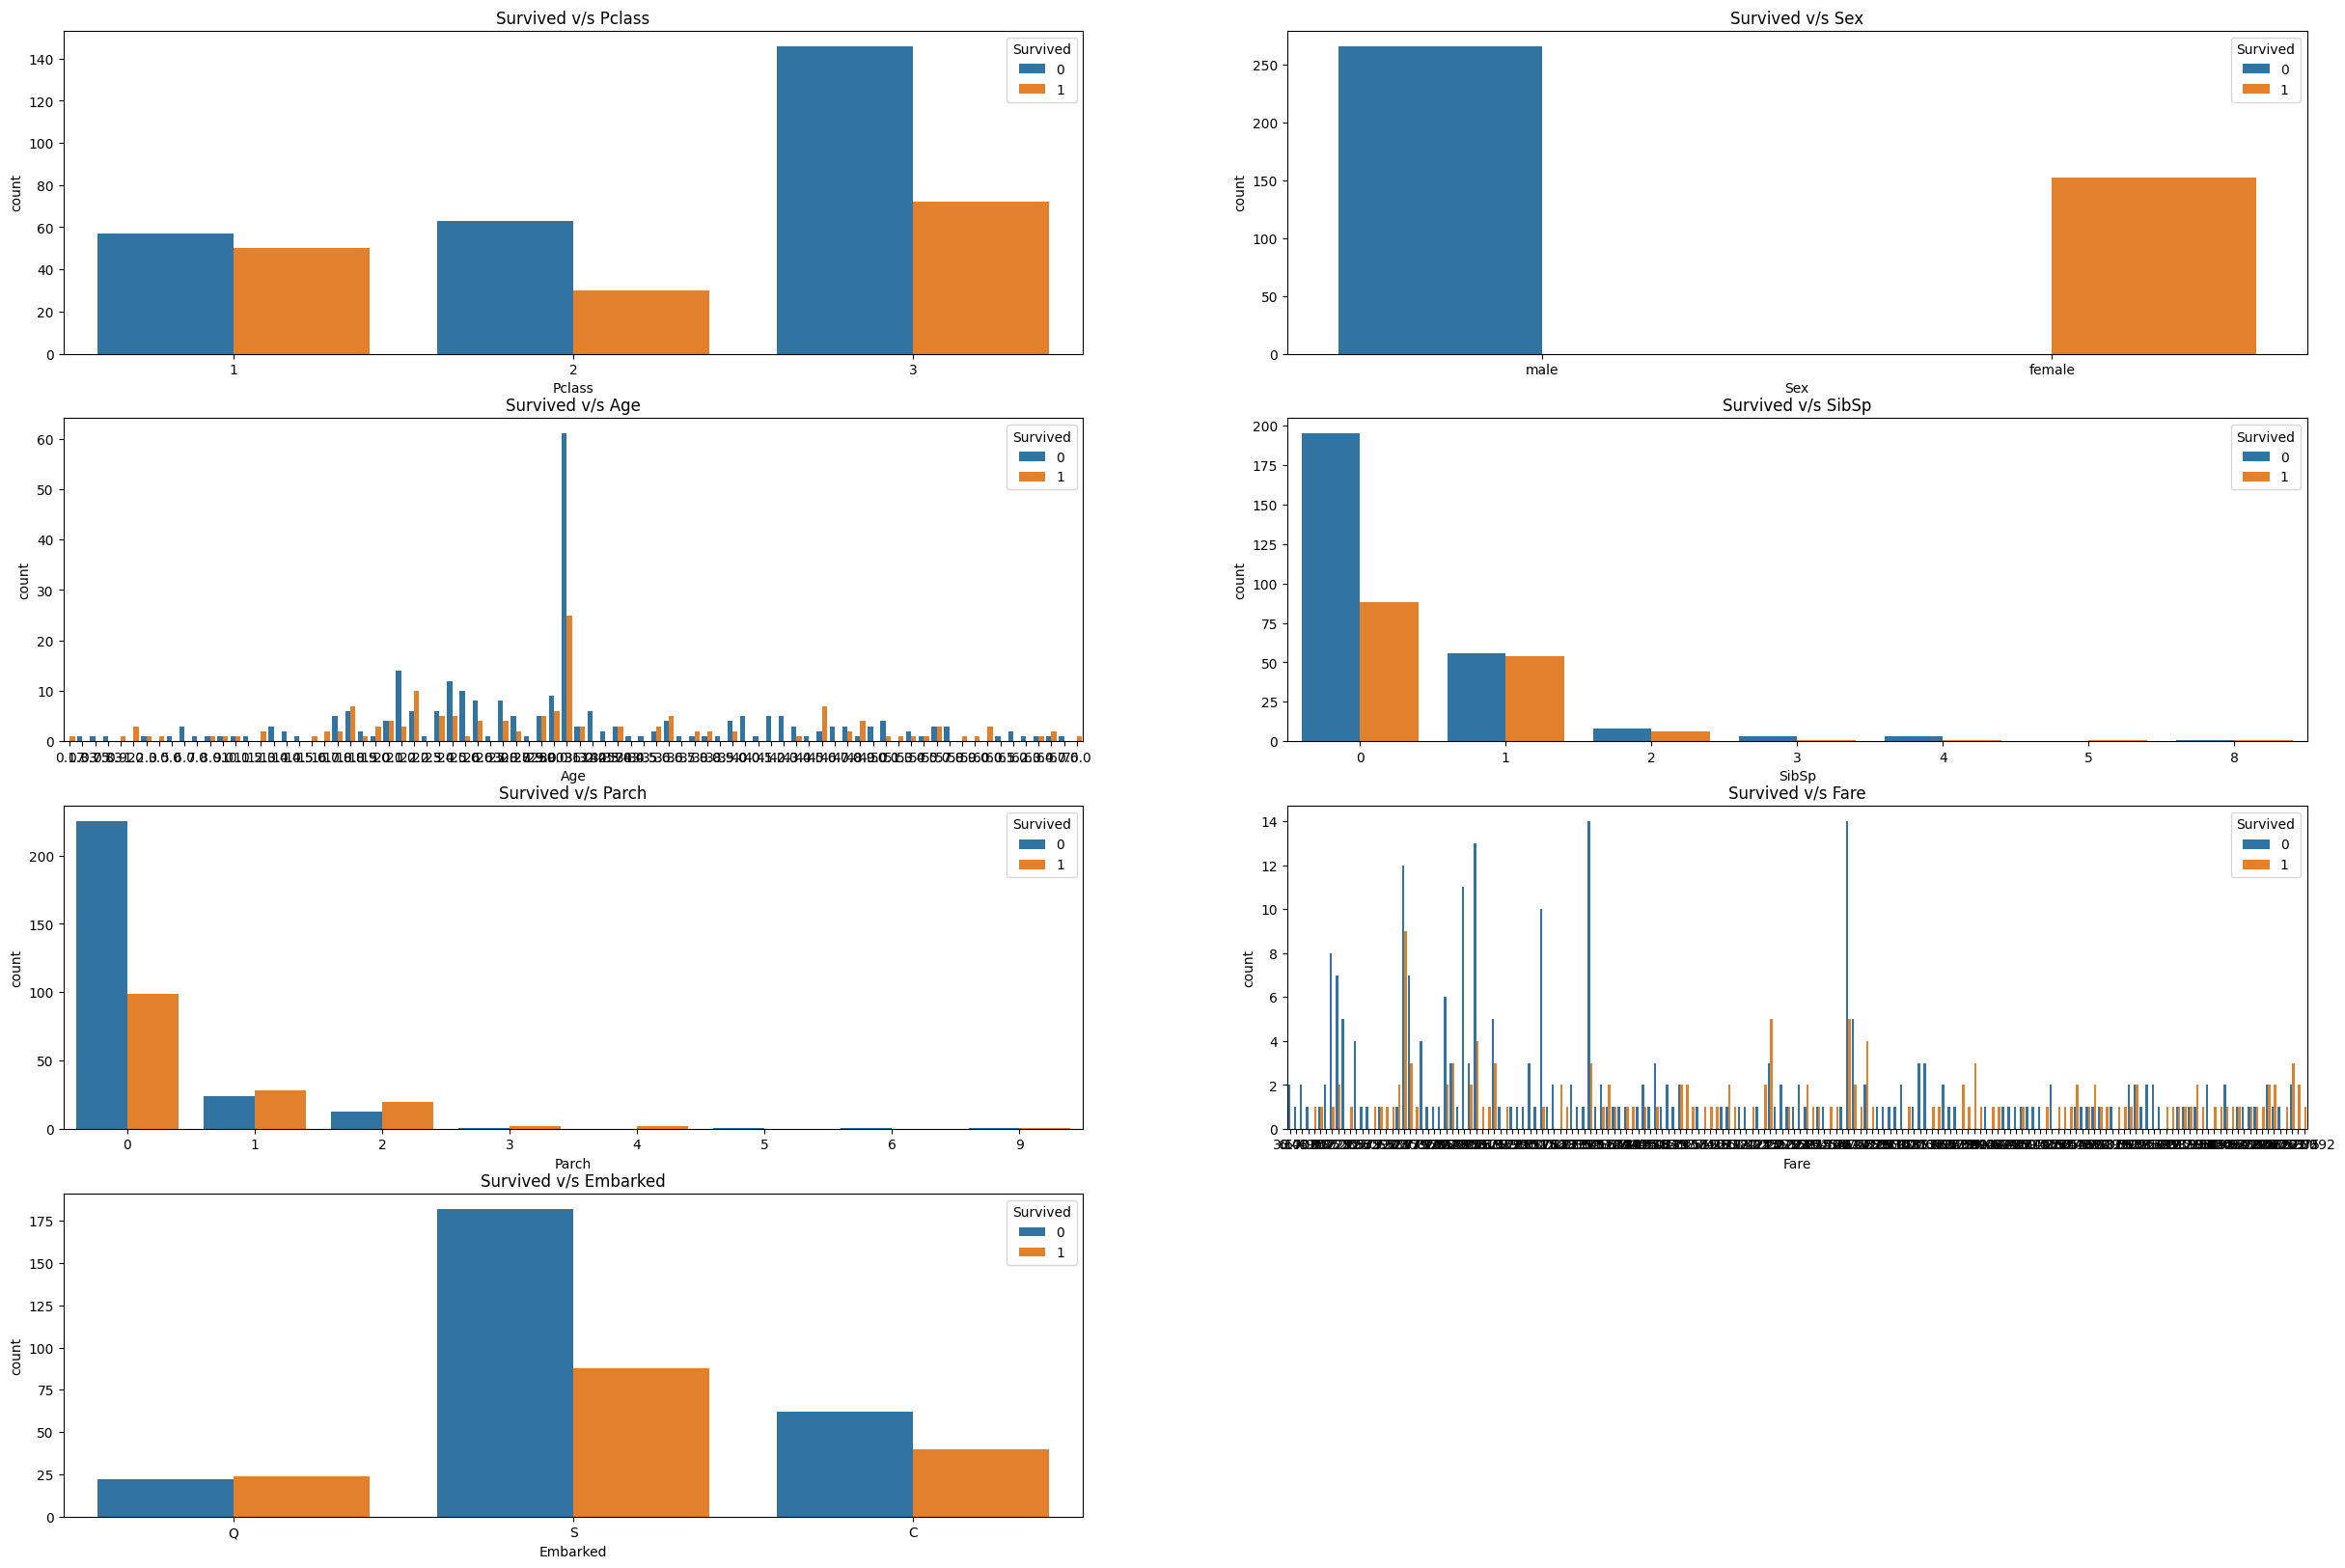

In [159]:
plt.figure(figsize=(30,20))

plt.subplot(4,2,1)
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title('Survived v/s Pclass')

plt.subplot(4,2,2)
sns.countplot(x='Sex',hue='Survived',data=df)
plt.title('Survived v/s Sex')

plt.subplot(4,2,3)
sns.countplot(x='Age',hue='Survived',data=df)
plt.title('Survived v/s Age')

plt.subplot(4,2,4)
sns.countplot(x='SibSp',hue='Survived',data=df)
plt.title('Survived v/s SibSp')


plt.subplot(4,2,5)
sns.countplot(x='Parch',hue='Survived',data=df)
plt.title('Survived v/s Parch')

plt.subplot(4,2,6)
sns.countplot(x='Fare',hue='Survived',data=df)
plt.title('Survived v/s Fare')

plt.subplot(4,2,7)
sns.countplot(x='Embarked',hue='Survived',data=df)
plt.title('Survived v/s Embarked')

<Axes: xlabel='Pclass', ylabel='Age'>

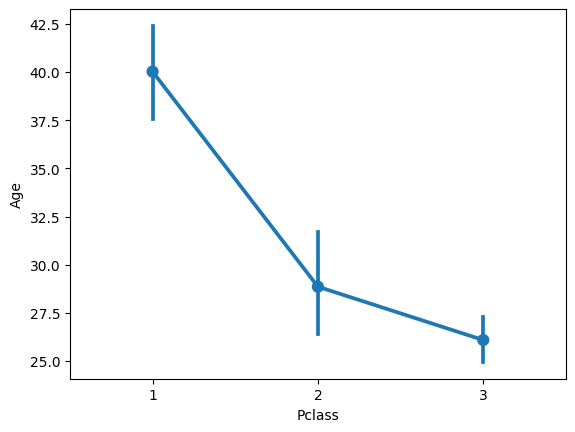

In [160]:
sns.pointplot(x="Pclass", y="Age", data=df)

<ipython-input-161-5daefb561f69>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


Text(0.5, 1.0, 'Heatmap of the dataset')

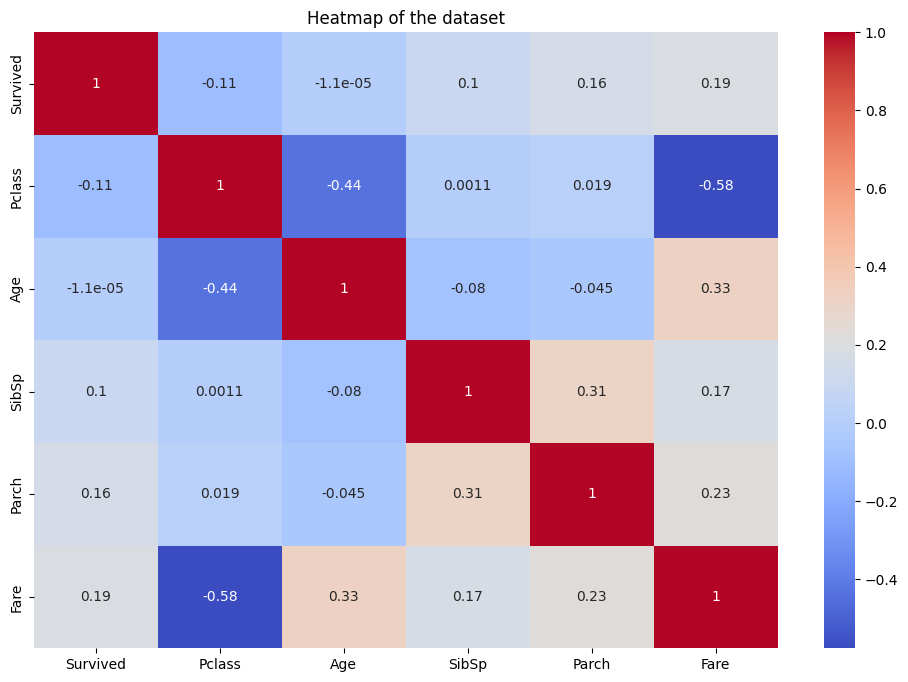

In [161]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Heatmap of the dataset')

**Encoding using LabelEncoder**

In [162]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
df['Embarked']=encoder.fit_transform(df['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.50000,0,0,7.8292,1
1,1,3,0,47.00000,1,0,7.0000,2
2,0,2,1,62.00000,0,0,9.6875,1
3,0,3,1,27.00000,0,0,8.6625,2
4,1,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,2
414,1,1,0,39.00000,0,0,108.9000,0
415,0,3,1,38.50000,0,0,7.2500,2
416,0,3,1,30.27259,0,0,8.0500,2


**Seperating input and output data**

In [163]:
x=df.drop(['Survived'],axis=1).values
y=df['Survived'].values

**Split into training and testing data**

In [164]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

**Scaling using StandardScaler**

In [165]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

# **Model creation using different classiffication algorithms**

In [166]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
knn_model=KNeighborsClassifier(n_neighbors=7)
nb_model=GaussianNB()
svm_model=SVC()
tree_model=DecisionTreeClassifier(criterion='entropy')
random_model=RandomForestClassifier(n_estimators=100)
lst_model=[knn_model,nb_model,svm_model,tree_model,random_model]

# **Performance Evaluation**

In [167]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
for i in lst_model:
  print(i)
  print("*"*100)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("*"*100)
  print(classification_report(y_test,y_pred))
  print("*"*100)
  print(confusion_matrix(y_test,y_pred))
  print("*"*100)

KNeighborsClassifier(n_neighbors=7)
****************************************************************************************************
****************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

****************************************************************************************************
[[85  0]
 [ 0 41]]
****************************************************************************************************
GaussianNB()
****************************************************************************************************
****************************************************************************************************